In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import InstanceHardnessThreshold

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
IHT = InstanceHardnessThreshold()

In [4]:
res.resample_directory(IHT, path, 'InstanceHardnessThreshold', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/InstanceHardnessThreshold/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/InstanceHardnessThreshold/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 2972 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s = 49)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 18s 113ms/step - loss: 0.2403 - tp: 4719.0000 - fp: 519.0000 - tn: 4689.0000 - fn: 489.0000 - accuracy: 0.9032 - precision: 0.9009 - recall: 0.9061 - auc: 0.9688 - val_loss: 2.0462 - val_tp: 171.0000 - val_fp: 133.0000 - val_tn: 171.0000 - val_fn: 133.0000 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 0.5625 - val_auc: 0.6328
Epoch 2/50
163/163 [==============================] - 17s 104ms/step - loss: 0.1130 - tp: 5003.0000 - fp: 219.0000 - tn: 4993.0000 - fn: 209.0000 - accuracy: 0.9589 - precision: 0.9581 - recall: 0.9599 - auc: 0.9915 - val_loss: 0.7347 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8438
Epoch 3/50
163/163 [==============================] - 18s 108ms/step - loss: 0.0722 - tp: 5068.0000 - fp: 138.0000 - tn: 5066.0000 - fn: 136.0000 - accuracy: 0.9737 - precision: 0.9735 - recall: 0.9739 - auc:

Epoch 22/50
163/163 [==============================] - 10s 59ms/step - loss: 0.0256 - tp: 5159.0000 - fp: 47.0000 - tn: 5161.0000 - fn: 49.0000 - accuracy: 0.9908 - precision: 0.9910 - recall: 0.9906 - auc: 0.9994 - val_loss: 0.4333 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9336
Epoch 23/50
163/163 [==============================] - 10s 60ms/step - loss: 0.0291 - tp: 5160.0000 - fp: 52.0000 - tn: 5160.0000 - fn: 52.0000 - accuracy: 0.9900 - precision: 0.9900 - recall: 0.9900 - auc: 0.9993 - val_loss: 0.4084 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9258
Epoch 24/50
163/163 [==============================] - 10s 59ms/step - loss: 0.0276 - tp: 5162.0000 - fp: 47.0000 - tn: 5161.0000 - fn: 46.0000 - accuracy: 0.9911 - precision: 0.9910 - recall: 0.9912 - auc: 0.9992 

Epoch 43/50
163/163 [==============================] - 10s 59ms/step - loss: 0.0169 - tp: 5173.0000 - fp: 31.0000 - tn: 5173.0000 - fn: 31.0000 - accuracy: 0.9940 - precision: 0.9940 - recall: 0.9940 - auc: 0.9996 - val_loss: 0.6587 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.9219
Epoch 44/50
163/163 [==============================] - 10s 59ms/step - loss: 0.0139 - tp: 5188.0000 - fp: 23.0000 - tn: 5185.0000 - fn: 20.0000 - accuracy: 0.9959 - precision: 0.9956 - recall: 0.9962 - auc: 0.9999 - val_loss: 0.2687 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9570
Epoch 45/50
163/163 [==============================] - 10s 58ms/step - loss: 0.0118 - tp: 5188.0000 - fp: 23.0000 - tn: 5189.0000 - fn: 24.0000 - accuracy: 0.9955 - precision: 0.9956 - recall: 0.9954 - auc: 0.9997 

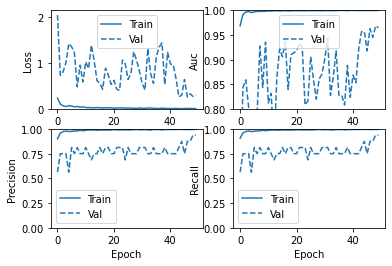

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.71      0.95      0.82       234
   PNEUMONIA       0.96      0.77      0.86       390

    accuracy                           0.84       624
   macro avg       0.84      0.86      0.84       624
weighted avg       0.87      0.84      0.84       624



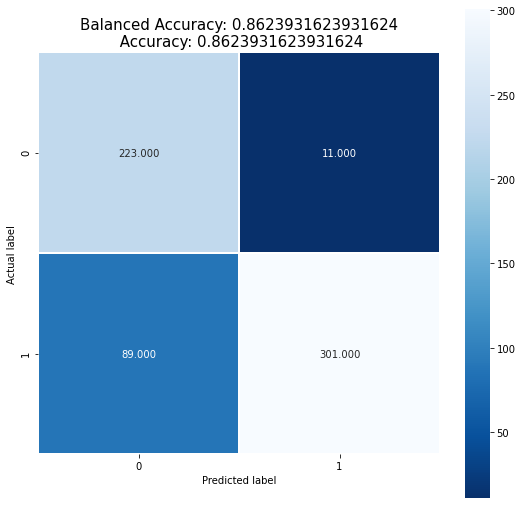

In [13]:
cnn.display_confusion_matrix(test_set)